# Value fn RMSE, random chain

Experiment: (Dec 30, 2020), via `/network/tmp1/chenant/ant/sr_trace/12-30`

Today: January 2, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files

Read the dfs, filter out the LSF value function agent from the `1228` runs and use the new LSF value function agent from the `1230` runs (which has the elig traces) for comparison.

In [2]:
trAg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/1228_exps_3agents/exp1_rwalk_3agents/small_progress.csv'
sfAg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/1230_exps/exp1_rwalk_LSF/small_prog.csv'

pd_df_sep = '\|\|'

In [3]:
# Traces agent (td lambda and expected elig traces)
el_ag_raw_df = pd.read_csv(trAg_in_path, sep=pd_df_sep)

# LSF value function agent
sf_ag_raw_df = pd.read_csv(sfAg_in_path, sep=pd_df_sep)

/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Filter and concat into a single big df

In [4]:
def script_get_data_df():
    # ==
    # Filter the elig trace dfs
    curdf = el_ag_raw_df[el_ag_raw_df['agentCls_name'] != 'SFReturnAgent']
    full_df = pd.concat([curdf, sf_ag_raw_df])
    return full_df

Data_df = script_get_data_df()
print(len(Data_df))
Data_df[0:5]

1458600


2020-12-28 17:12:33,558  num_episodes         envCls_name  \
0  2020-12-28 17:12:33,582           400  RandomWalkChainEnv   
1  2020-12-28 17:12:33,585           400  RandomWalkChainEnv   
2  2020-12-28 17:12:33,589           400  RandomWalkChainEnv   
3  2020-12-28 17:12:33,597           400  RandomWalkChainEnv   
4  2020-12-28 17:12:33,603           400  RandomWalkChainEnv   

      agentCls_name  seed  gamma     lr  lamb  use_true_R_fn  episode_idx  \
0  SarsaLambdaAgent     2    1.0  0.001   0.0          False            0   
1  SarsaLambdaAgent     2    1.0  0.001   0.0          False            1   
2  SarsaLambdaAgent     2    1.0  0.001   0.0          False            2   
3  SarsaLambdaAgent     2    1.0  0.001   0.0          False            3   
4  SarsaLambdaAgent     2    1.0  0.001   0.0          False            4   

   ...  cumulative_reward  v_fn_rmse  sf_G_rmse value_loss_avg  \
0  ...                1.0   0.584445       None       0.006250   
1  ...                0.0   0.584445       None       0.000000   
2  ...                1.0   0.584368       None       0.014677   
3  ...                1.0   0.584291       None       0.007905   
4  ...                0.0   0.584291       None       0.000000   

   reward_loss_avg sf_loss_avg et_loss_avg 2020-12-30 17:23:26,600 eta_trace  \
0             None        None        None                     NaN       NaN   
1             None        None        None                     NaN       NaN   
2             None        None        None                     NaN       NaN   
3             None        None        None                     NaN       NaN   
4             None        None        None                     NaN       NaN   

   sf_matrix_rmse  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 21 columns]

## Comparing: LSF with difference interpolation and traces

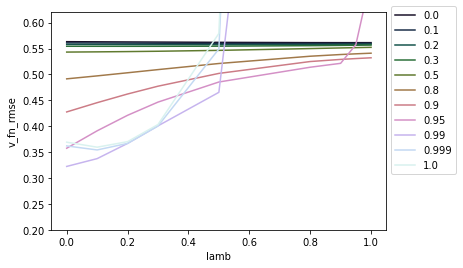

In [5]:
def script_plot_lsf_v_fn_rmse_episode(df, n_episode_idx=9, lr=0.1, 
                                      xscale='linear', yscale='linear'):
    plt_x = 'lamb'
    plt_y = 'v_fn_rmse'
    plt_hue = 'eta_trace'
    plt_ci = None
    plt_n_boot = 100
    
    # Filter
    df = df.copy(deep=True)
    df = df[df['agentCls_name'] == 'SFReturnAgent']
    df = df[df['lr'] == lr]
    # round
    df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    
    cur_df = df[df['episode_idx']==n_episode_idx]
    n_hues = len(set(cur_df[plt_hue].values))
    c_palette = sns.color_palette("cubehelix", n_hues) 
    
    
    sns.lineplot(x=plt_x, y=plt_y, hue=plt_hue,
                 ci=plt_ci, n_boot=plt_n_boot, 
                 palette=c_palette, 
                 data=cur_df)
    
    plt.gca().set_ylim(top=0.62)
    plt.gca().set_ylim(bottom=0.2)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
    
script_plot_lsf_v_fn_rmse_episode(Data_df, n_episode_idx=9, lr=0.06)

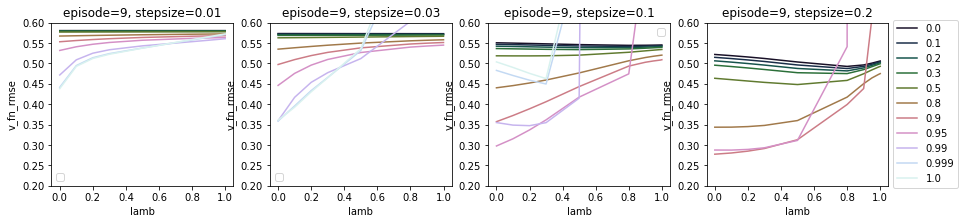

In [6]:
def script_subplot_lsf_v_rmse(df, n_episode_idx, ylim=None):
    lr_list = [0.01, 0.03, 0.1, 0.2]
    plt.figure(figsize=(15,3))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1,len(lr_list), i+1)
        script_plot_lsf_v_fn_rmse_episode(df, n_episode_idx, lr=lr)
        plt.title(f'episode={n_episode_idx}, stepsize={lr}')
        
        if ylim is None:
            plt.ylim([0.2, 0.6])
        else:
            plt.ylim(ylim)
        
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
script_subplot_lsf_v_rmse(Data_df, 9)

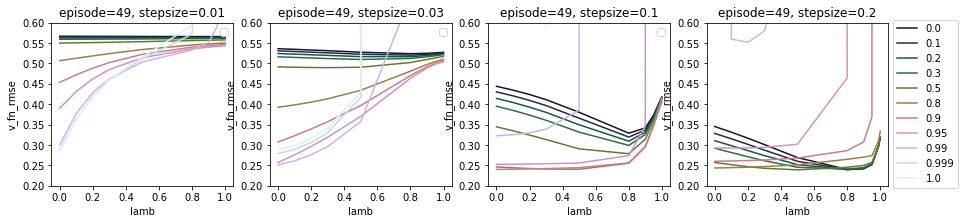

In [7]:
script_subplot_lsf_v_rmse(Data_df, 49)

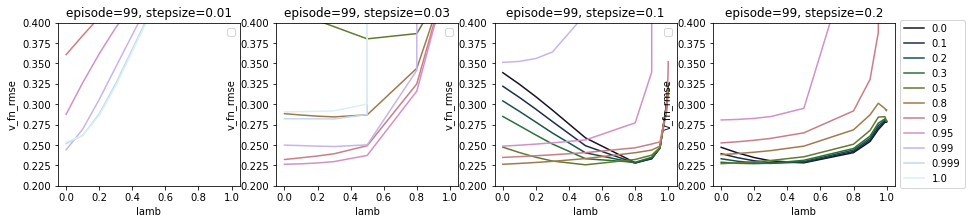

In [8]:
script_subplot_lsf_v_rmse(Data_df, 99, ylim=[0.2, 0.4])

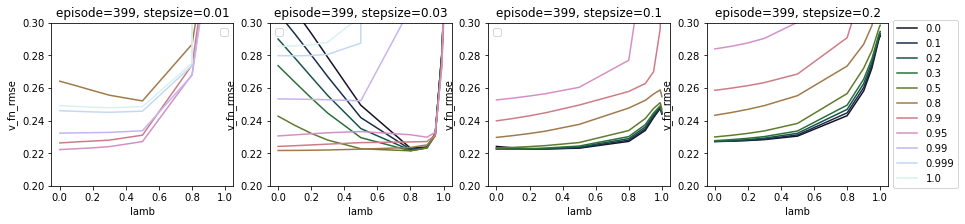

In [9]:
script_subplot_lsf_v_rmse(Data_df, 399, ylim=[0.2, 0.3])

## Compare: LSF value vs. MF value function errors

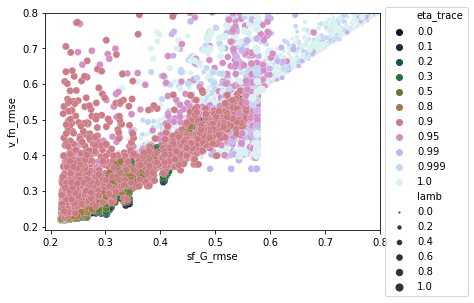

In [10]:
def script_scatter_lsf_v_fn_errors(x, y, hue, size, lr, data):
    plt_x = x
    plt_y = y
    plt_hue = hue #'eta_trace'  #'eta_trace'
    plt_size = size
    plt_ci = None
    plt_n_boot = 1
    
    # Filter
    df = data.copy(deep=True)
    df = df[df['agentCls_name'] == 'SFReturnAgent']
    # round
    df[plt_hue] = [round(e, 3) for e in df[plt_hue]]
    
    # Palette
    n_hues = len(set(df[plt_hue].values))
    c_palette = sns.color_palette("cubehelix", n_hues) 
    
    # Filter for stepsize
    df = df
    df = df[df['lr'] == lr]
    df['lamb'] = [round(e, 3) for e in df['lamb']]
    #df['lamb'] = [str(l) for l in df['lamb'].values]
    #df = df[df['lr'] == 0.1]
    
    # sf_G_rmse, sf_matrix_rmse
    sns.scatterplot(x=plt_x, y=plt_y, hue=plt_hue, 
                    size=plt_size, sizes=(1, 50),
                    palette=c_palette, 
                    data=df)
    plt.xlim([0.19, 0.8])
    plt.ylim([0.19, 0.8])
    plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
    

script_scatter_lsf_v_fn_errors(x='sf_G_rmse', y='v_fn_rmse', 
                               hue='eta_trace', size='lamb', 
                               lr=0.1,
                               data=Data_df)

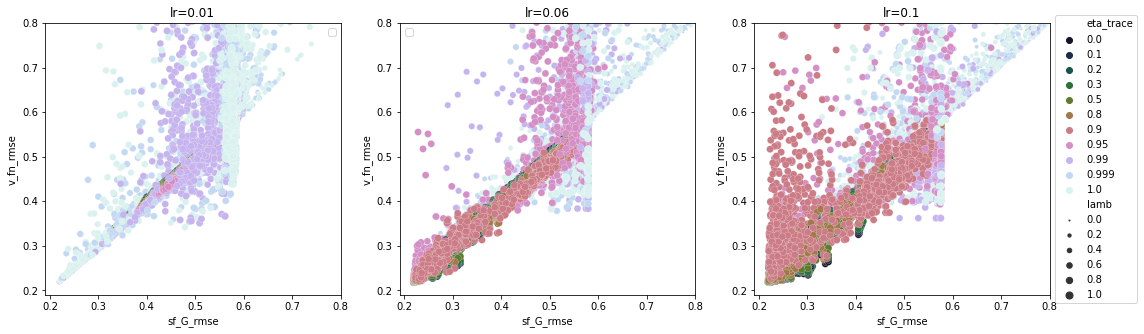

In [11]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(18, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_G_rmse', y='v_fn_rmse', 
                               hue='eta_trace', size='lamb', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()    

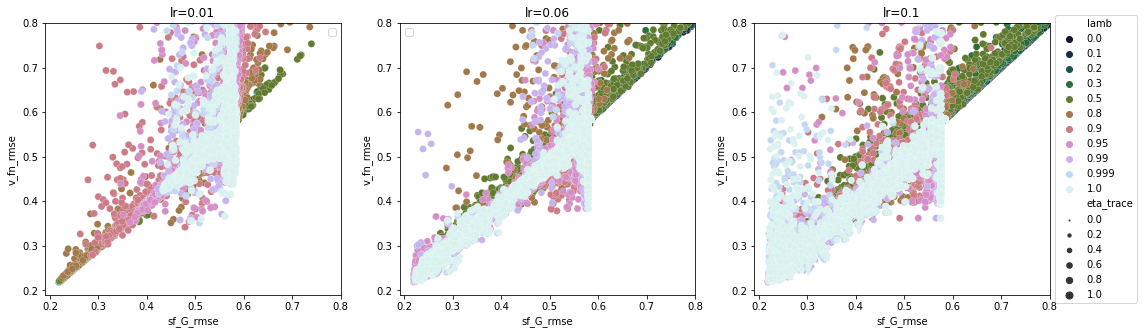

In [12]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(18, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_G_rmse', y='v_fn_rmse', 
                               hue='lamb', size='eta_trace', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()  

At Value function errors tends to be worse (

## Compare: SF matrix and value function
### Hue is interpolation 

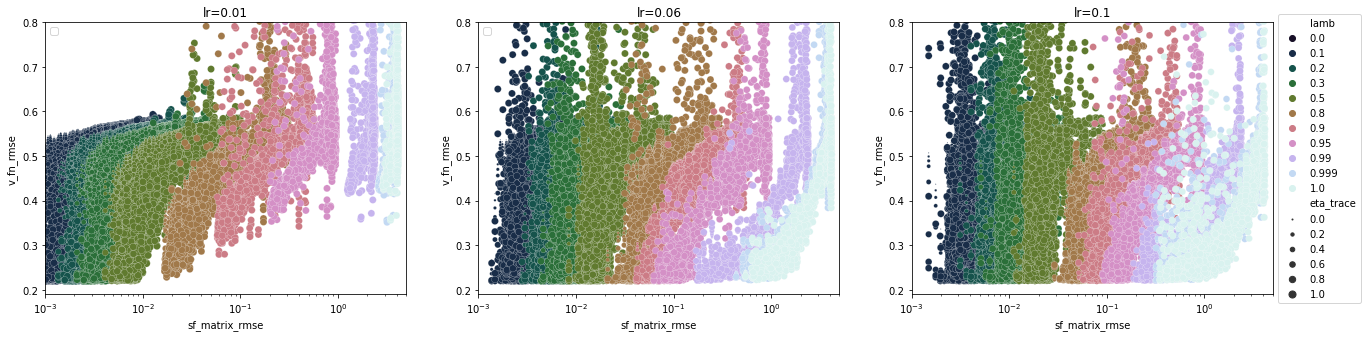

In [13]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(22, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_matrix_rmse', y='v_fn_rmse', 
                               hue='lamb', size='eta_trace', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        plt.xlim([1e-3,5.0])
        plt.xscale('log')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()  

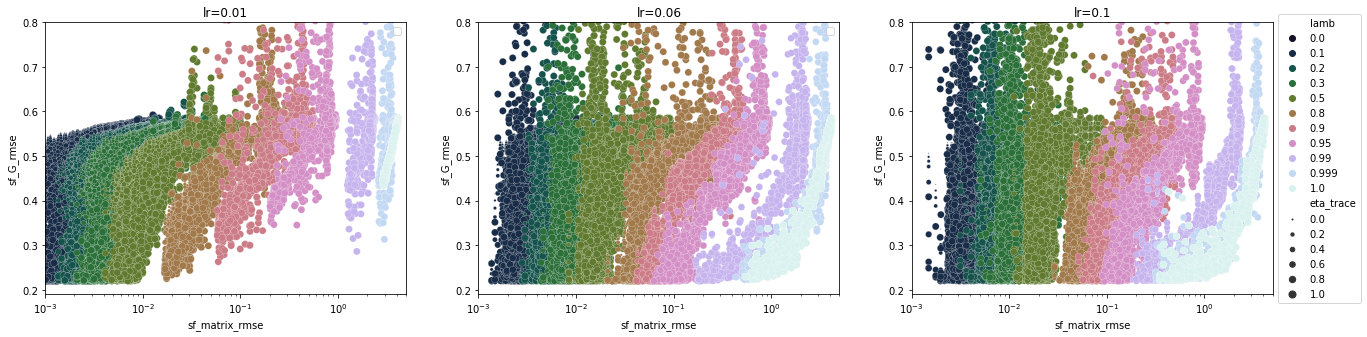

In [14]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(22, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_matrix_rmse', y='sf_G_rmse', 
                               hue='lamb', size='eta_trace', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        plt.xlim([1e-3,5.0])
        plt.xscale('log')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()  

### Hue is trace decay parameter

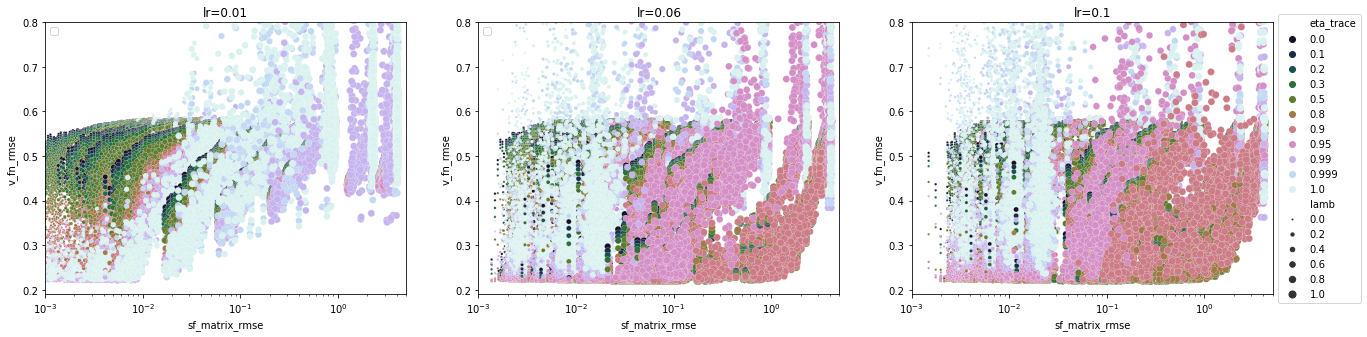

In [15]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(22, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_matrix_rmse', y='v_fn_rmse', 
                               hue='eta_trace', size='lamb', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        plt.xlim([1e-3,5.0])
        plt.xscale('log')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()

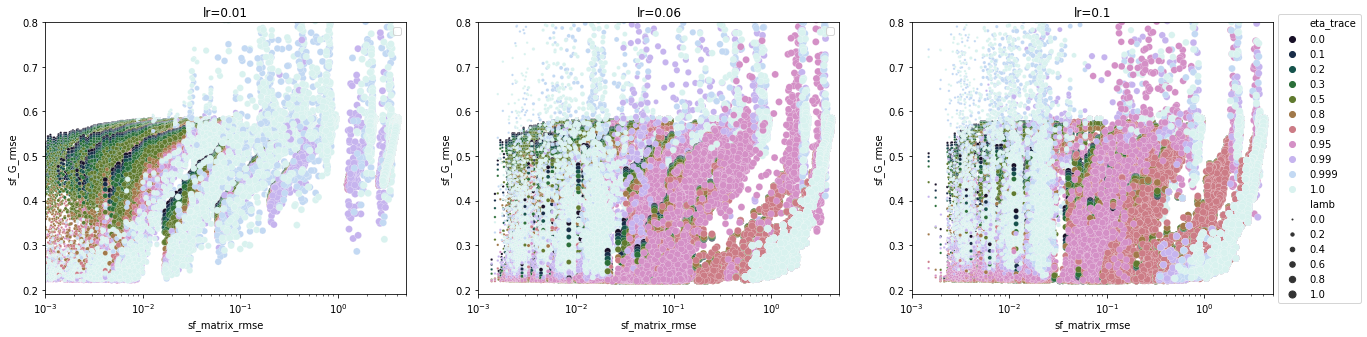

In [16]:
def script_multi_scatters():
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(22, 5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1, len(lr_list), i+1)
        script_scatter_lsf_v_fn_errors(x='sf_matrix_rmse', y='sf_G_rmse', 
                               hue='eta_trace', size='lamb', 
                               lr=lr,
                               data=Data_df)
        
        plt.title(f'lr={lr}')
        plt.xlim([1e-3,5.0])
        plt.xscale('log')
        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
            
script_multi_scatters()

## Scatter: SF error over training

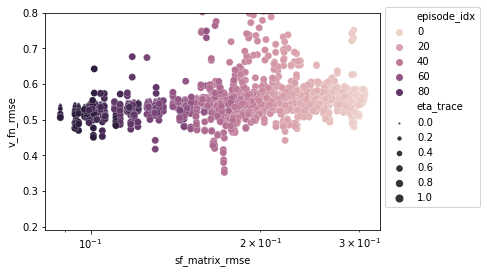

In [17]:
def script_scatter_errors_over_training(x, y, hue, size, lr, lamb, data):
    plt_x = x
    plt_y = y
    plt_hue = hue #'eta_trace'  #'eta_trace'
    plt_size = size
    plt_ci = None
    plt_n_boot = 1
    
    # Filter
    df = data.copy(deep=True)
    df = df[df['agentCls_name'] == 'SFReturnAgent']
    df = df[df['episode_idx'] <= 100]
    
    # Palette
    # n_hues = len(set(df[plt_hue].values))
    # c_palette = sns.color_palette("cubehelix", n_hues) 
    
    # Filter for stepsize
    df = df
    df = df[df['lr'] == lr]
    df['lamb'] = [round(e, 3) for e in df['lamb']]
    df = df[df['lamb'] == lamb]
    
    # Plot
    sns.scatterplot(x=plt_x, y=plt_y, hue=plt_hue, 
                    size=plt_size, sizes=(1, 50),
                    data=df)
    #plt.xlim([0.19, 0.8])
    plt.ylim([0.19, 0.8])
    plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
    

script_scatter_errors_over_training(x='sf_matrix_rmse', y='v_fn_rmse', 
                               hue='episode_idx', size='eta_trace', 
                               lr=0.01, lamb=0.8,
                               data=Data_df)
plt.xscale('log')

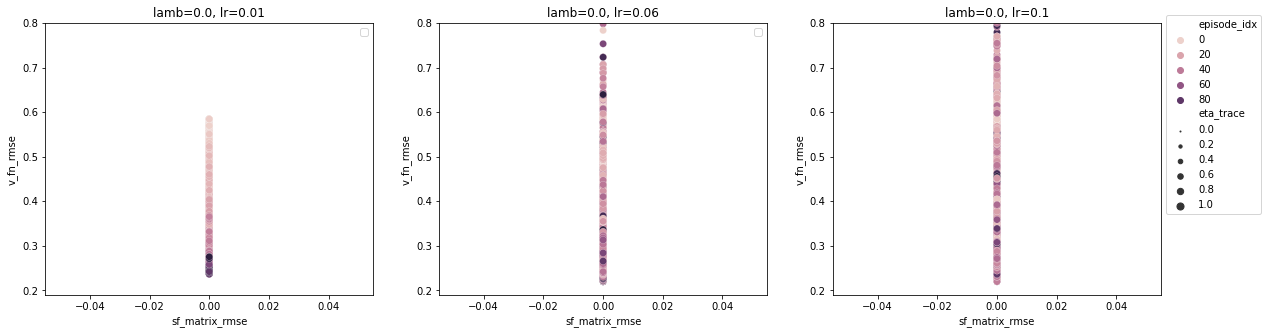

In [18]:
def script_multi_scatter_over_training(lamb):
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(20,5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1,len(lr_list), i+1)
        script_scatter_errors_over_training(x='sf_matrix_rmse', y='v_fn_rmse', 
                                   hue='episode_idx', size='eta_trace', 
                                   lr=lr, lamb=lamb,
                                   data=Data_df)
        if lamb > 0.0:
            plt.xscale('log')
        plt.ylim([0.19, 0.8])
        plt.title(f'lamb={lamb}, lr={lr}')

        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
script_multi_scatter_over_training(lamb=0.0)

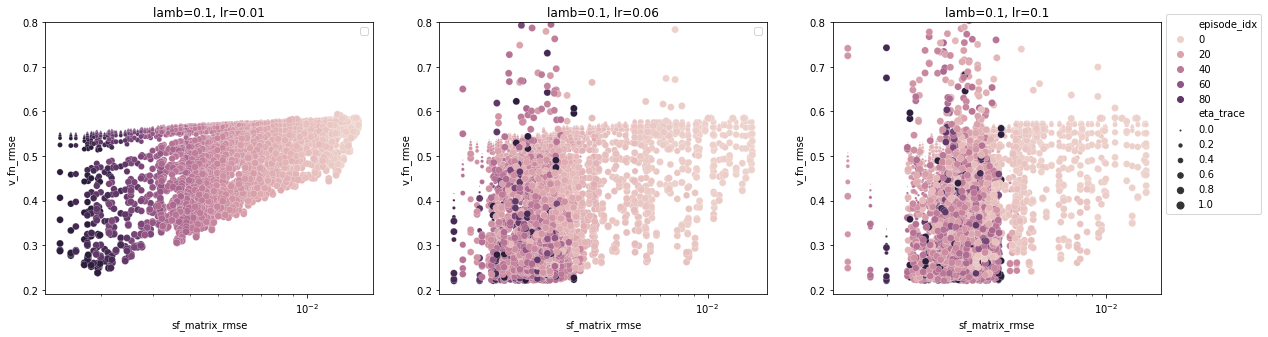

In [19]:
script_multi_scatter_over_training(lamb=0.1)

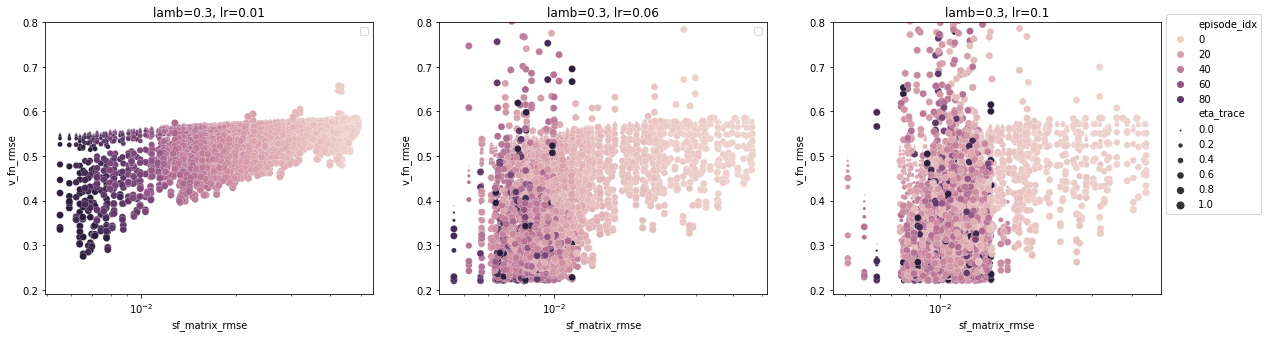

In [20]:
script_multi_scatter_over_training(lamb=0.3)

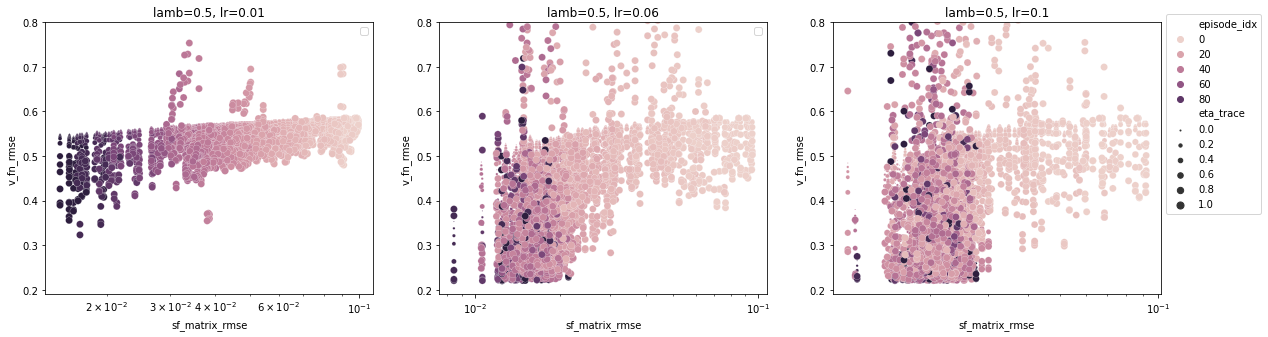

In [21]:
script_multi_scatter_over_training(lamb=0.5)

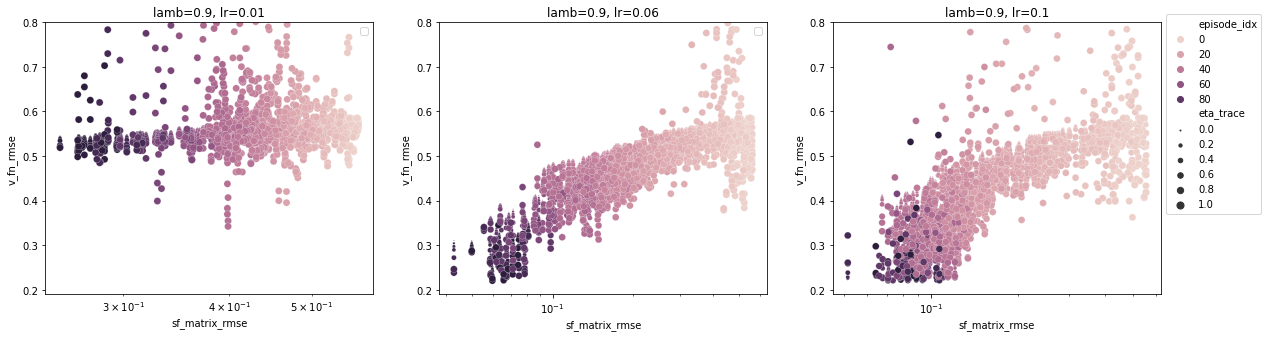

In [22]:
script_multi_scatter_over_training(lamb=0.9)

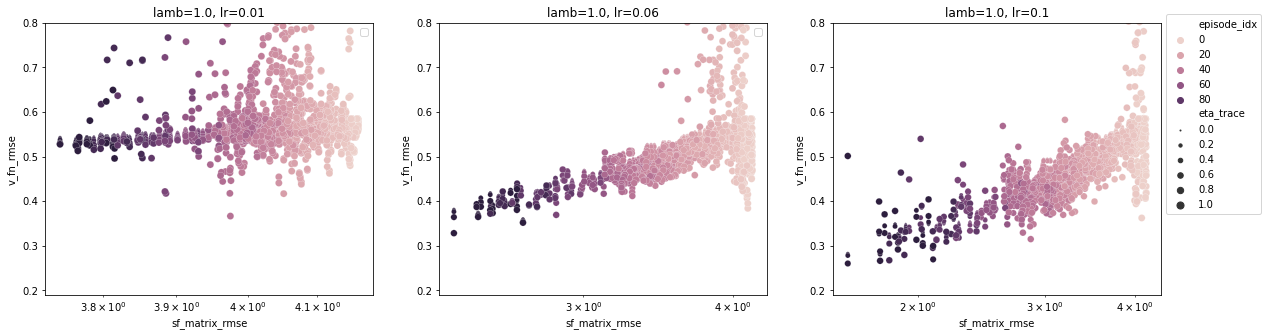

In [23]:
script_multi_scatter_over_training(lamb=1.0)

### X axis is training episode

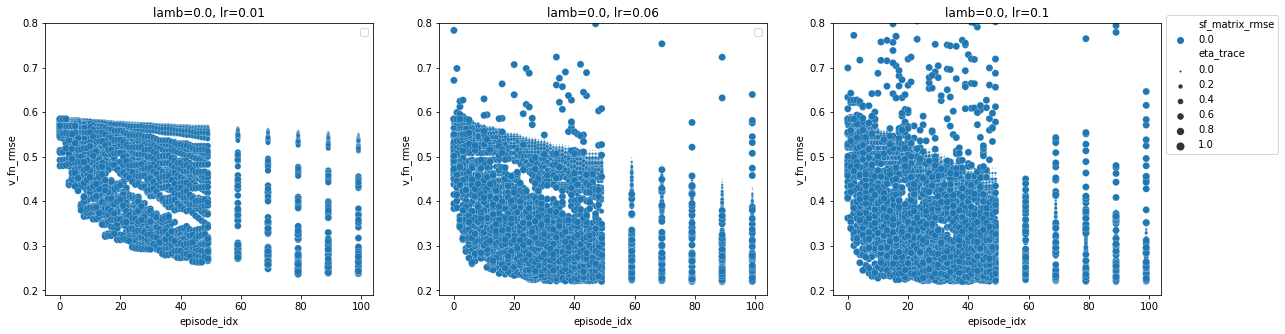

In [24]:
def script_multi_scatter_x_epis_over_training(lamb):
    lr_list = [0.01, 0.06, 0.1]
    plt.figure(figsize=(20,5))
    
    for i, lr in enumerate(lr_list):
        plt.subplot(1,len(lr_list), i+1)
        script_scatter_errors_over_training(x='episode_idx', y='v_fn_rmse', 
                                   hue='sf_matrix_rmse', size='eta_trace', 
                                   lr=lr, lamb=lamb,
                                   data=Data_df)
        if lamb > 0.0:
            plt.xscale('log')
        plt.ylim([0.19, 0.8])
        plt.title(f'lamb={lamb}, lr={lr}')

        # Legend
        if i < (len(lr_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
script_multi_scatter_x_epis_over_training(lamb=0.0)

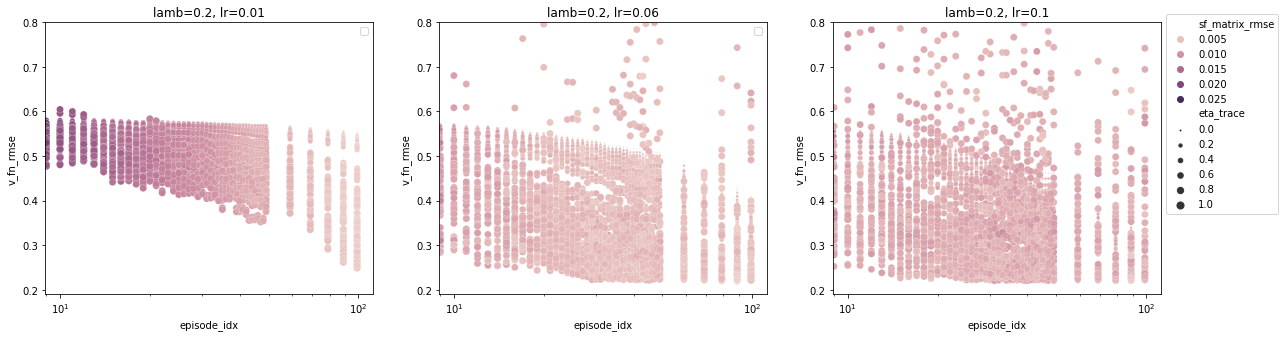

In [25]:
script_multi_scatter_x_epis_over_training(lamb=0.2)

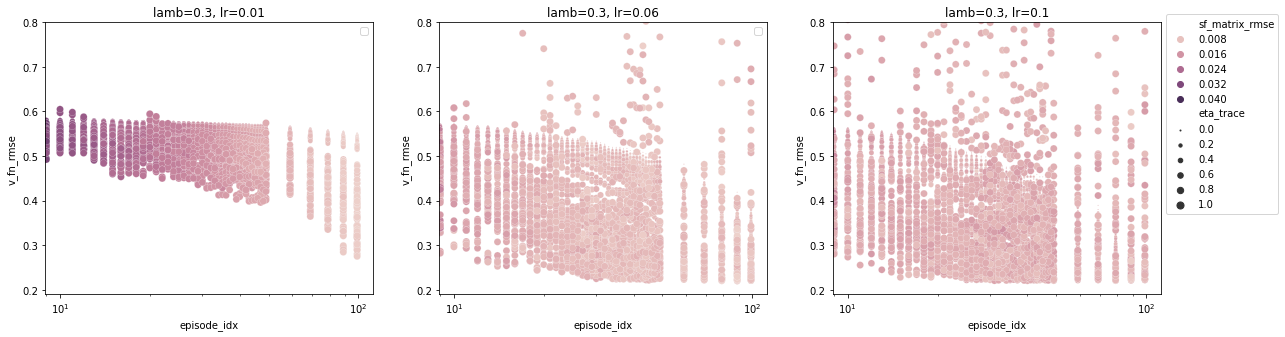

In [26]:
script_multi_scatter_x_epis_over_training(lamb=0.3)

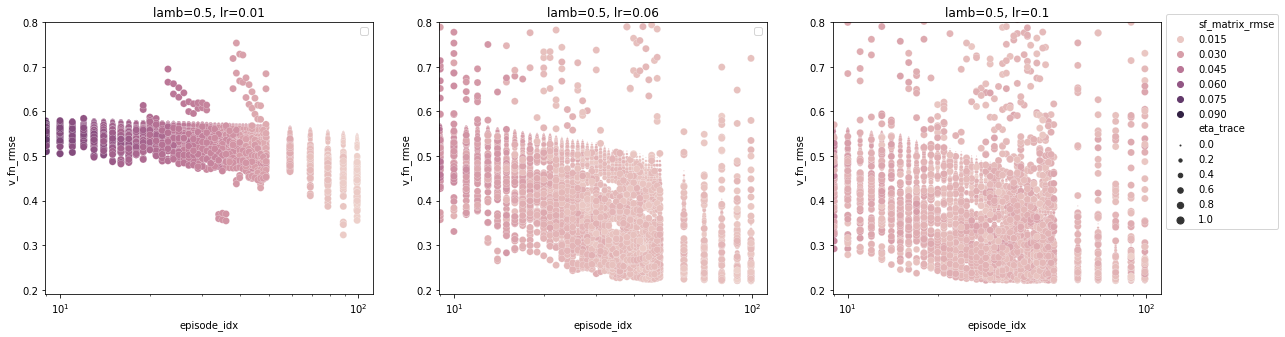

In [27]:
script_multi_scatter_x_epis_over_training(lamb=0.5)

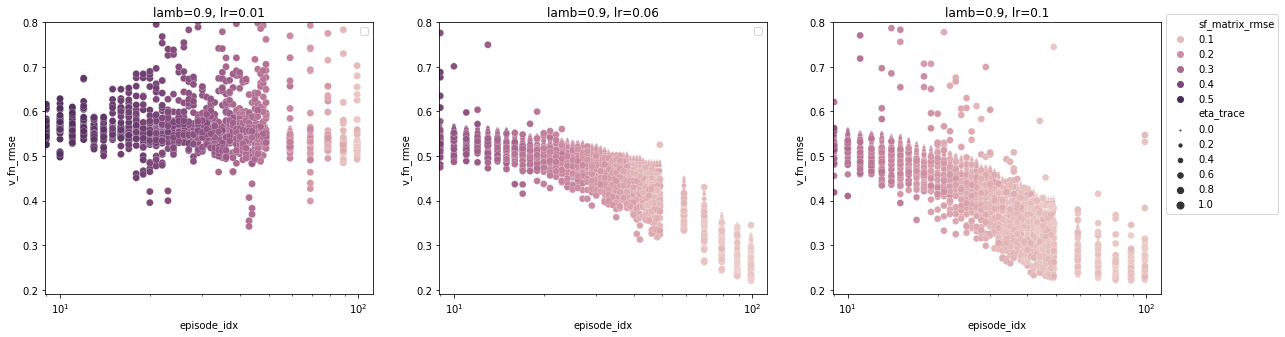

In [28]:
script_multi_scatter_x_epis_over_training(lamb=0.9)

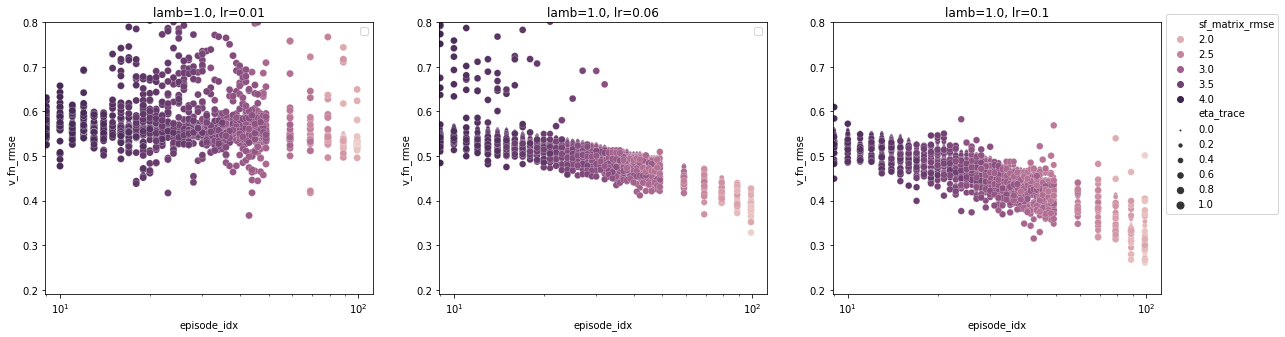

In [29]:
script_multi_scatter_x_epis_over_training(lamb=1.0)